# Small Introduction to Feature Extraction on Images

## Do our imports
For this notebook we will use numpy, matplotlib, and scikit-image (imported as sk-image)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature

## Load data and get a single image as an example

In [3]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
image_index = 100 # pick a specific image
image = images[:, :, :, image_index]

Images Shape: (32, 32, 3, 50000)


## Hand-crafted Feature Extractor 
The following function extracts features from a single image. It returns both the feature vector, and an image that can be plotted to show what the features represent.

The feature being extracted is the _Histogram of Oriented Gradients_. For more detail on this feature you can visit https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

You may want to use such a feature extractor to obtain features to evaluate your experiements on. You may also want to explore what arguments to the $hog()$ function do, and how they may be tweaked. There are many feature extractors that you can investigate, and some models can even learn on the original feature space of the image (pixel RGB value). 

Note that this may take a long time to execute for the whole dataset. You may want to write your matrix of extracted features to disk as needed.

In [9]:
# Extract features from a single image
_, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)

print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')
print(hog_image)

The extracted feature vector is of length 15876 per sample
[0.19884065 0.         0.         ... 0.         0.         0.08107247] [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03131791 0.         ... 0.12925933 0.         0.03053152]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1155673  0.         ... 0.27351511 0.         0.18515475]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0693772  0.         ... 0.08393976 0.         0.04903652]]


## Visualise the HoG features
This is purely for your benefit, so that we can see roughly what the output from the $hog()$ function is actually doing. 

Notice that the feature extractor is providing a representation that gives an indication of the direction and intensity of the gradients within localised areas of the image.

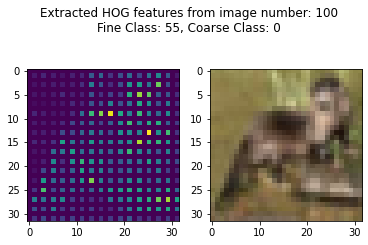

In [5]:
plt.figure()
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(image)
plt.suptitle(f'Extracted HOG features from image number: {image_index}\nFine Class: {label_fine[image_index]}, Coarse Class: {label_coarse[image_index]}')
plt.show(block=False)

## Using the features
If you remember back to the labs, we were usually using data in a matrix $X$, formatted in the shape ${S}\times{}{F}$, where ${S}$ was the number of individual samples (or data points), and ${F}$ was the number of feature dimensions for each sample.

Therefore, for most of the methods we have covered, we can extract features for each sample $\mathbf{x_i}$, which should be a vector of length $F$, and then stack them into our $S\times{}F$ matrix to use in our experiments. 

Some approaches may work on slightly different shaped input, such as neural networks and convolutional neural networks. Convolutional neural networks usually expect an input of shape $S\times{}H\times{}W\times{}C$; or *samples* $S$ which are of shape *height* $H$, *width* $W$ and *channel* $C$.

## The Dataset
A description of the Cifar100 dataset can be found online at https://www.cs.toronto.edu/~kriz/cifar.html. This includes some baseline results and descriptions of the classes.